<a href="https://colab.research.google.com/github/khagerthey/VIS1/blob/main/PS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aok good trying to figure out weird data and mistakes in it! almost always the case!

install more sensors, better sensors, sensors cheap; other measures such as observations by employees; returns by customers; etc

realizing that data are limited is a finding! make a case for better data:
https://www.google.com/search?q=lord+kelvin%3A+if+you+cant+measure+can+improve&rlz=1CAKDZI_enUS997US997&oq=lord+kelvin%3A+if+you+cant+measure+can+improve&aqs=chrome..69i57.263j0j7&sourceid=chrome&ie=UTF-8

In [51]:

import time, os, sys, re
import zipfile, json, datetime, string 
import numpy as np
from statistics import *

import matplotlib.pyplot as plt 
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import plotly as py

import plotly.graph_objects as go

import urllib                                                 

from google.colab import files

import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() 

%matplotlib inline
%matplotlib 
#%matplotlib --list 
#interactive plots:
%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
%matplotlib nbagg

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
plt.style.available #list available styles :) may install more
plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

Using matplotlib backend: nbAgg


#**Hypothesis:** 
Line 3 is experiencing high amounts of glass breakages. The cause of breakages is believed by management to be due to thermal shock. I believe this is actually not true and this idea is primarily stemed from a lack of documentation. Breakages are likely a mix of issues due to impact from the line, human error, lack of training, and thermal shock.

This food production company is currently investigating a high amount of glass breakages on their highest performing production line (3). Data recieved from said company is confidential, I am not premitted to link or post directly from source. All private information (including company name) has been removed.



##First Data Collection Attempt

In [52]:
Start=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Line%203%20bottle%20count%20record%20.xlsx%20-%20START%20(1).csv')
Start.dropna(axis = 0, how = 'all')
#Start = Start.rename(columns={'Unnamed: 0':'Location'})
#NaN is okay, data not expected to be there
Start

,DAY,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER
0,FEBUARY 27,39167,39165,38771,38402,33864,33684
1,FEBUARY 28,1990,1251,1245,1226,8296,3264
2,March 1,140529,140450,138020,134007,139700,136980
3,March 2,113923,113031,111134,82622,112333,112080
4,March 6,120721,120643,118643,117599,120109,119556
5,March 7,120079,120042,118307,114180,119908,119508
6,March 8,200,76,75,86,0,84


In [53]:
print(Start.sum())

DAY              FEBUARY 27FEBUARY 28March 1March 2March 6March...
DEPALLETIZER                                                536609
FILLER                                                      534658
CAPPER                                                      526195
DUD DETECTOR                                                488122
LABELER                                                     534210
TRAYMAKER                                                   525156
dtype: object


In [54]:
Loss=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Line%203%20bottle%20count%20record%20.xlsx%20-%20LOSS%20(1).csv')
Loss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER
0,FEBUARY 27,2,394,369,4538,180
1,FEBUARY 28,739,6,19,-7070,5032
2,March 1,79,2430,4013,-5693,2720
3,March 2,892,1897,28512,-29711,253
4,March 6,78,2000,1044,-2510,553
5,March 7,37,1735,4127,-5728,400
6,March 8,124,1,-11,86,-84


In [55]:
print(Loss.sum()) 

DAY                        FEBUARY 27FEBUARY 28March 1March 2March 6March...
DEPALLETIZER TO FILLER                                                  1951
FILLER TO CAPPER                                                        8463
CAPPER TO DUD DETECTOR                                                 38073
DUD DETECTOR TO LABELER                                               -46088
LABELER TO TRAYMAKER                                                    9054
dtype: object


Why are there negatives at the dud detector to the labeler? Negatives imply a gain in glass. Must be further investigated. 

In [56]:
Totalloss = pd.merge(Loss, Start, how='outer', on=['DAY'], indicator='there')
Totalloss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER,there
0,FEBUARY 27,2,394,369,4538,180,39167,39165,38771,38402,33864,33684,both
1,FEBUARY 28,739,6,19,-7070,5032,1990,1251,1245,1226,8296,3264,both
2,March 1,79,2430,4013,-5693,2720,140529,140450,138020,134007,139700,136980,both
3,March 2,892,1897,28512,-29711,253,113923,113031,111134,82622,112333,112080,both
4,March 6,78,2000,1044,-2510,553,120721,120643,118643,117599,120109,119556,both
5,March 7,37,1735,4127,-5728,400,120079,120042,118307,114180,119908,119508,both
6,March 8,124,1,-11,86,-84,200,76,75,86,0,84,both


In [57]:
Totalloss.there.value_counts(sort=False)
#Okay, same data from before not expected to merge

left_only     0
right_only    0
both          7
Name: there, dtype: int64

In [58]:
Totalloss = pd.merge(Loss, Start, how='inner', on=['DAY'], indicator='there')
Totalloss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER,there
0,FEBUARY 27,2,394,369,4538,180,39167,39165,38771,38402,33864,33684,both
1,FEBUARY 28,739,6,19,-7070,5032,1990,1251,1245,1226,8296,3264,both
2,March 1,79,2430,4013,-5693,2720,140529,140450,138020,134007,139700,136980,both
3,March 2,892,1897,28512,-29711,253,113923,113031,111134,82622,112333,112080,both
4,March 6,78,2000,1044,-2510,553,120721,120643,118643,117599,120109,119556,both
5,March 7,37,1735,4127,-5728,400,120079,120042,118307,114180,119908,119508,both
6,March 8,124,1,-11,86,-84,200,76,75,86,0,84,both


In [59]:
TL = Totalloss[['DAY', 'DEPALLETIZER ', 'DEPALLETIZER TO FILLER', 'FILLER ', 'FILLER TO CAPPER', 'CAPPER', 'CAPPER TO DUD DETECTOR', 'DUD DETECTOR', 'DUD DETECTOR TO LABELER', 'LABELER ', 'LABELER TO TRAYMAKER', 'TRAYMAKER']]

TL
#columns reordered for clearer comparision


,DAY,DEPALLETIZER,DEPALLETIZER TO FILLER,FILLER,FILLER TO CAPPER,CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER,LABELER TO TRAYMAKER,TRAYMAKER
0,FEBUARY 27,39167,2,39165,394,38771,369,38402,4538,33864,180,33684
1,FEBUARY 28,1990,739,1251,6,1245,19,1226,-7070,8296,5032,3264
2,March 1,140529,79,140450,2430,138020,4013,134007,-5693,139700,2720,136980
3,March 2,113923,892,113031,1897,111134,28512,82622,-29711,112333,253,112080
4,March 6,120721,78,120643,2000,118643,1044,117599,-2510,120109,553,119556
5,March 7,120079,37,120042,1735,118307,4127,114180,-5728,119908,400,119508
6,March 8,200,124,76,1,75,-11,86,86,0,-84,84


This first round of data collection showed miscalculations. Negatives imply glass was added back onto the line, this is not possible as the areas are after the filler and therefore would not have product in them. Management has concluded that the negatives imply that the line was being used for "rework" (a process in which finished goods are placed back on the line for adjustments such as relabeling). Negatives were addressed to management to which they recalibrated the machine and moved rework to other lines not in use to maintain moree usable data.

#More Investigating

###The negative amounts lead for inaccurate results. Below are the recorded amounts after the machine had been recalibrated and rework had been relocated. 

In [60]:
NewStart=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Line%203%20bottle%20count%20record%20.xlsx%20-%20NEW%20START%20(2).csv')
NewStart

,DAY,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER
0,March 16,14728,14710,12951,7913,7857,7127
1,March 20,18464,18400,15858,7359,6975,6322
2,March 21,37347,37328,36375,29665,29471,29368
3,March 22,37452,37428,36437,34321,34068,33736
4,March 23,100423,100117,97264,91731,91617,90858
5,March 27,75997,75709,73937,70185,70096,69362
6,March 28,25476,25384,25302,17868,17762,17640
7,March 29,122140,122078,121863,112672,102387,91918
8,April 3,136292,136242,136162,126619,125726,124902
9,April 4,135137,135081,134894,133917,132813,130112


In [61]:
print(NewStart.sum())

DAY              March 16March 20March 21March 22March 23March ...
DEPALLETIZER                                               2156108
FILLER                                                     2133411
CAPPER                                                     2076216
DUD DETECTOR                                               1952829
LABELER                                                    1937330
TRAYMAKER                                                  1913819
dtype: object


In [62]:
NewLoss=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Line%203%20bottle%20count%20record%20.xlsx%20-%20NEW%20LOSS%20(3).csv')
NewLoss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER,SUM
0,March 16,18,1759,5038,56,730,7601
1,March 20,64,2542,8499,384,653,12142
2,March 21,19,953,6710,194,103,7979
3,March 22,24,991,2116,253,332,3716
4,March 23,306,2853,5533,114,759,9565
5,March 27,288,1772,3752,89,734,6635
6,March 28,92,82,7434,106,122,7836
7,March 29,62,215,9191,10285,10469,30222
8,April 3,50,80,9543,893,824,11390
9,April 4,56,187,977,1104,2701,5025


In [63]:
print(NewLoss.sum())

DAY                        March 16March 20March 21March 22March 23March ...
DEPALLETIZER TO FILLER                                                 22697
FILLER TO CAPPER                                                       57195
CAPPER TO DUD DETECTOR                                                123387
DUD DETECTOR TO LABELER                                                15499
LABELER TO TRAYMAKER                                                   23511
SUM                                                                   242289
dtype: object


The recalibrated data now shows the high breakage areas as filler to capper, dud detector to labeler, and labeler to traymaker.

In [64]:
NewTotalloss = pd.merge(NewLoss, NewStart, how='outer', on=['DAY'], indicator='true')
NewTotalloss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER,SUM,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER,true
0,March 16,18,1759,5038,56,730,7601,14728,14710,12951,7913,7857,7127,both
1,March 20,64,2542,8499,384,653,12142,18464,18400,15858,7359,6975,6322,both
2,March 21,19,953,6710,194,103,7979,37347,37328,36375,29665,29471,29368,both
3,March 22,24,991,2116,253,332,3716,37452,37428,36437,34321,34068,33736,both
4,March 23,306,2853,5533,114,759,9565,100423,100117,97264,91731,91617,90858,both
5,March 27,288,1772,3752,89,734,6635,75997,75709,73937,70185,70096,69362,both
6,March 28,92,82,7434,106,122,7836,25476,25384,25302,17868,17762,17640,both
7,March 29,62,215,9191,10285,10469,30222,122140,122078,121863,112672,102387,91918,both
8,April 3,50,80,9543,893,824,11390,136292,136242,136162,126619,125726,124902,both
9,April 4,56,187,977,1104,2701,5025,135137,135081,134894,133917,132813,130112,both


In [65]:
NewTotalloss.true.value_counts(sort=False)

left_only      0
right_only     0
both          14
Name: true, dtype: int64

##Merged Total

In [66]:
NTL = NewTotalloss[['DAY', 'DEPALLETIZER ', 'DEPALLETIZER TO FILLER', 'FILLER ', 'FILLER TO CAPPER', 'CAPPER', 'CAPPER TO DUD DETECTOR', 'DUD DETECTOR', 'DUD DETECTOR TO LABELER', 'LABELER ', 'LABELER TO TRAYMAKER', 'TRAYMAKER']]

NTL
#Total counts for a month's time

,DAY,DEPALLETIZER,DEPALLETIZER TO FILLER,FILLER,FILLER TO CAPPER,CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER,LABELER TO TRAYMAKER,TRAYMAKER
0,March 16,14728,18,14710,1759,12951,5038,7913,56,7857,730,7127
1,March 20,18464,64,18400,2542,15858,8499,7359,384,6975,653,6322
2,March 21,37347,19,37328,953,36375,6710,29665,194,29471,103,29368
3,March 22,37452,24,37428,991,36437,2116,34321,253,34068,332,33736
4,March 23,100423,306,100117,2853,97264,5533,91731,114,91617,759,90858
5,March 27,75997,288,75709,1772,73937,3752,70185,89,70096,734,69362
6,March 28,25476,92,25384,82,25302,7434,17868,106,17762,122,17640
7,March 29,122140,62,122078,215,121863,9191,112672,10285,102387,10469,91918
8,April 3,136292,50,136242,80,136162,9543,126619,893,125726,824,124902
9,April 4,135137,56,135081,187,134894,977,133917,1104,132813,2701,130112


In [67]:
Percentages=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Line%203%20bottle%20count%20record%20.xlsx%20-%20PERCENTAGES%20(3).csv')
Percentages
#Percentage of breakages recorded in each area for the day
#aok: wonder how you calculated percentages?
#ideally should calc percentages in python as opposed to loading data with percentages that you calculated probably in excel
#eg:
#https://www.google.com/search?q=pandas+calculate+percentage&rlz=1CAKDZI_enUS997US997&oq=pandas+calculate+per&aqs=chrome.0.0i512l4j69i57j0i512l5.6713j0j7&sourceid=chrome&ie=UTF-8

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER
0,March 16,0.24,23.14,66.28,0.74,9.60
1,March 20,0.53,20.94,70.00,3.16,5.38
2,March 21,0.24,11.94,84.10,2.43,1.29
3,March 22,0.65,26.67,56.94,6.81,8.93
4,March 23,3.20,29.83,57.85,1.19,7.94
5,March 27,4.34,26.71,56.55,1.34,11.06
6,March 28,1.17,1.05,94.87,1.35,1.56
7,March 29,0.21,0.71,30.41,34.03,34.64
8,April 3,0.44,0.70,83.78,7.84,7.23
9,April 4,1.11,3.72,19.44,21.97,53.75


In [68]:
Percentages.style.set_precision(2).background_gradient(cmap = 'Blues')
#Gradient applied to make large loss more visable

<ipython-input-68-10d13b53d032>:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER
0,March 16,0.24,23.14,66.28,0.74,9.60
1,March 20,0.53,20.94,70.00,3.16,5.38
2,March 21,0.24,11.94,84.10,2.43,1.29
3,March 22,0.65,26.67,56.94,6.81,8.93
4,March 23,3.20,29.83,57.85,1.19,7.94
5,March 27,4.34,26.71,56.55,1.34,11.06
6,March 28,1.17,1.05,94.87,1.35,1.56
7,March 29,0.21,0.71,30.41,34.03,34.64
8,April 3,0.44,0.70,83.78,7.84,7.23
9,April 4,1.11,3.72,19.44,21.97,53.75


Here we can see the percentage of breakages in each location for a production month period. 

##Sankey Graph

In [69]:
label = ["DEPALLETIZER TO FILLER", "FILLER TO CAPPER", "CAPPER TO DUD DETECTOR", "DUD DETECTOR TO LABELER", "LABELER TO TRAYMAKER", "MARCH", "APRIL"]
source = [0,0,1,1,2,2,3,3,4,4]
target = [5,6,5,6,5,6,5,6,5,6,]
value = [873, 11167, 48273, 11481, 13902, 21824, 46028, 75114, 4018, 9609]
link = dict(source = source, target = target, value = value)
node = dict(label = label, pad=35, thickness=10)
data = go.Sankey(link = link, node=node)

In [70]:
fig = go.Figure(data)
fig.update_layout(
    hovermode = 'x',
    title="Summed Loss at Line Locations",
    font=dict(size = 10, color = 'white'),
    paper_bgcolor='#51504f'
)
fig.show()
#aok per colors eg see:
#https://www.google.com/search?q=sankey+plotly+color&rlz=1CAKDZI_enUS997US997&oq=sankey+plotly+co&aqs=chrome.1.69i57j0i22i30l9.2685j0j7&sourceid=chrome&ie=UTF-8

In [71]:
CLEAN=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Line%203%20bottle%20count%20record%20.xlsx%20-%20Sankey%20Clean.csv')
CLEAN

,INDEX,LABEL,SOURCE,TARGET,VALUE
0,0,DEPALLETIZER,0,1,2156108
1,1,LOSS,1,2,22697
2,2,FILLER,2,3,2133411
3,3,LOSS,3,4,57195
4,4,CAPPER,4,5,2076216
5,5,LOSS,5,6,123387
6,6,DUD DETECTOR,6,7,1952829
7,7,LOSS,7,8,15499
8,8,LABELER,8,9,1937330
9,9,LOSS,9,10,23511


In [111]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      thickness = 5,
      line = dict(color = "green", width = 15),
      label = CLEAN.LABEL,
      color = "GREEN"
    ),
    link = dict(
          
      # indices correspond to labels!!!
      source = CLEAN.SOURCE, 
      target = CLEAN.TARGET,
      value  = CLEAN.VALUE
  ))])

fig.show()


As displayed we can see that the high breakage areas as recorded from March to April (a month of production) are the Dud Detector to Labeler, Filler to Capper, and Capper to Dud Detector. The Dud Detector is expected to have a high volume of removed bottles as it is actively kicking off any "duds" from the line. From the Filler to the Capper could possibly result from thermal shock as it is immediately after filling hot product into the bottle. After the Dud Detector to the Labeler is interesting because there is no easy assumption as to why this is. This is not a section that is in human contact, I would suggest maintaince investigating the line for signs of impact breakage.

#Breakage Analysis



Data provided by company glass supplier and limited for privacy. ONLY salvaged broken glass are used for analysis. 

In [73]:
breakage=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/breakage.xlsx%20-%20Sheet2.csv')
breakage = breakage.rename(columns={'Months 2022':'MONTHS 2022'})
breakage.sort_values('MONTHS 2022',inplace=True) #aok more intuitive
breakage
#there are 4 types of glass breakages
#renamed for the sake of merge

,MONTHS 2022,Stress Cracks,Impact Breakage,Spontaneous Breakage,Edge Damage
11,1,209,168,7,199
10,2,276,118,3,115
9,3,557,216,11,134
8,4,499,82,6,160
7,5,272,175,3,102
6,6,450,141,1,132
5,7,193,183,0,95
4,8,652,60,5,178
3,9,937,207,13,103
2,10,504,66,18,62


Text(0.5, 1.0, 'Cause of Breakage')

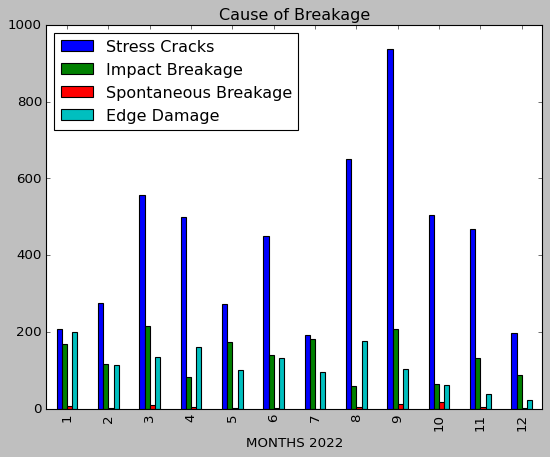

In [74]:
breakage.plot(x='MONTHS 2022', y=['Stress Cracks','Impact Breakage','Spontaneous Breakage','Edge Damage'], kind='bar')
#breakage.plot.bar(figsize = (13,10))
plt.title('Cause of Breakage')
#the different breakages recorded throughout 2022

The primary cause of breakage has been stress cracks which are likely the result of thermal shock.

The amount of stress cracks throughout the year vary in volume, this could be due to product demand and amount of production. Determining the cause of outlyers requires more investigation. 


It is also possible that because cause of breakages can only be investigated through salvaged glass that undocumented breakages could prove a different primary cause of breakages.

#Glass POs

In [75]:
CHGlass=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/TOTAL%20SUM.csv')
CHGlass
#POs are product orders, below is the total amount of material ordered and recieved for each month

,MONTHS,TOTAL POS
0,12,324896
1,11,766480
2,10,793936
3,9,1267552
4,8,940368
5,7,336336
6,6,761934
7,5,441644
8,4,940368
9,3,1063920


In [76]:
CHGlass = CHGlass.rename(columns={'TOTAL POS':'TOTAL PRODUCT RECEIVED'})
CHGlass = CHGlass.rename(columns={'MONTHS':'MONTHS 2022'})
CHGlass
#New header gives better descriptions

,MONTHS 2022,TOTAL PRODUCT RECEIVED
0,12,324896
1,11,766480
2,10,793936
3,9,1267552
4,8,940368
5,7,336336
6,6,761934
7,5,441644
8,4,940368
9,3,1063920


In [77]:
print(CHGlass.sum())

MONTHS 2022                    78
TOTAL PRODUCT RECEIVED    8554922
dtype: int64


This are the total sum of glass ordered each month in 2022 with a grand total of 8554922 for the year. This is only glass used on line 3 which will be our main focus towards glass breakages.
This data was retrieved from our inventroy database via Windows SL.

In [78]:
mergedbreakage = pd.merge(CHGlass, breakage, how='inner', on=['MONTHS 2022'], indicator='both')
mergedbreakage

,MONTHS 2022,TOTAL PRODUCT RECEIVED,Stress Cracks,Impact Breakage,Spontaneous Breakage,Edge Damage,both
0,12,324896,198,87,1,23,both
1,11,766480,469,132,4,39,both
2,10,793936,504,66,18,62,both
3,9,1267552,937,207,13,103,both
4,8,940368,652,60,5,178,both
5,7,336336,193,183,0,95,both
6,6,761934,450,141,1,132,both
7,5,441644,272,175,3,102,both
8,4,940368,499,82,6,160,both
9,3,1063920,557,216,11,134,both


In [79]:
mergedbreakage["TOTAL PRODUCT RECEIVED"] /=1000
mergedbreakage['TOTAL PRODUCT RECEIVED'] = mergedbreakage['TOTAL PRODUCT RECEIVED'].astype(float).round(1)
mergedbreakage

,MONTHS 2022,TOTAL PRODUCT RECEIVED,Stress Cracks,Impact Breakage,Spontaneous Breakage,Edge Damage,both
0,12,324.9,198,87,1,23,both
1,11,766.5,469,132,4,39,both
2,10,793.9,504,66,18,62,both
3,9,1267.6,937,207,13,103,both
4,8,940.4,652,60,5,178,both
5,7,336.3,193,183,0,95,both
6,6,761.9,450,141,1,132,both
7,5,441.6,272,175,3,102,both
8,4,940.4,499,82,6,160,both
9,3,1063.9,557,216,11,134,both


Text(0.5, 1.0, 'Amount vs. Break')

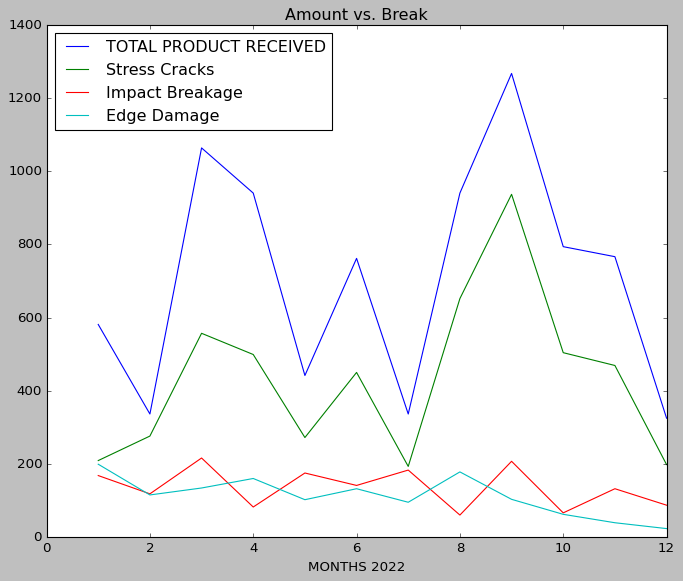

In [80]:
mergedbreakage.plot(x='MONTHS 2022', y=['TOTAL PRODUCT RECEIVED','Stress Cracks','Impact Breakage','Edge Damage'], kind='line', figsize=(10,8))
plt.title('Amount vs. Break')
#purpose of graph to show correlation of po to breakage
#TOTAL PRODUCT RECEIVED is shown in thousands

This graph displays glass breakage analysis provided from the company's glass distributor. The glass amounts are estimated based on paper records. As we can see the amount of stress cracks follow the total amount in trend while. Reported impact breakages are very low which is surprising when compared to the amount of locational breakages seen above after the filler.

When addressed to the company, their reasoning for this is due to inconsistent documentation and lack of training.

#Conclusion

The company needs to reevaluate their training processes, especially in relation to documentation before drawing any certain conclusion. It is clear that there is inconsistent data. In addition, training on the line will likely reduce breakages due to human error and would be the most cost effective start to addressing the problem.